# 시작

In [1]:
# !pip install pykrx

In [1]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'sudo'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.
'rm'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


In [1]:
from pykrx import stock
from pykrx import bond
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import os

plt.rcParams['font.family'] = 'NanumGothic'

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

## yg_plus

In [6]:
# 시가 고가 저가 종가 거래량 조회
yg_plus = stock.get_market_ohlcv("20200703", "20220510", "037270")
yg_plus

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-07-03,4100,4470,3630,3900,66519638
2020-07-06,3965,4070,3715,3815,11580605
2020-07-07,3800,3800,3330,3470,12317461
2020-07-08,3470,4020,3450,3535,22046394
2020-07-09,3550,3575,3340,3455,4987272
...,...,...,...,...,...
2022-05-03,7070,7220,7040,7100,296146
2022-05-04,7150,7270,7110,7160,338841
2022-05-06,7030,7350,7030,7320,568008


In [5]:
# 수정주가
yg_plus_adj = stock.get_market_ohlcv("20200703", "20220510", "037270")
yg_plus_adj

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-07-03,4100,4470,3630,3900,66519638
2020-07-06,3965,4070,3715,3815,11580605
2020-07-07,3800,3800,3330,3470,12317461
2020-07-08,3470,4020,3450,3535,22046394
2020-07-09,3550,3575,3340,3455,4987272
...,...,...,...,...,...
2022-05-03,7070,7220,7040,7100,296146
2022-05-04,7150,7270,7110,7160,338841
2022-05-06,7030,7350,7030,7320,568008


### 실적발표 별 그래프

In [7]:
yg_plus_2017 = stock.get_market_ohlcv("20170101", "20171231", "037270")
yg_plus_2018 = stock.get_market_ohlcv("20180101", "20181231", "037270")
yg_plus_2019 = stock.get_market_ohlcv("20190101", "20191231", "037270")
yg_plus_2020 = stock.get_market_ohlcv("20200101", "20201231", "037270")
yg_plus_2021 = stock.get_market_ohlcv("20210101", "20211231", "037270")
yg_plus_2022 = stock.get_market_ohlcv("20220101", "20221231", "037270")

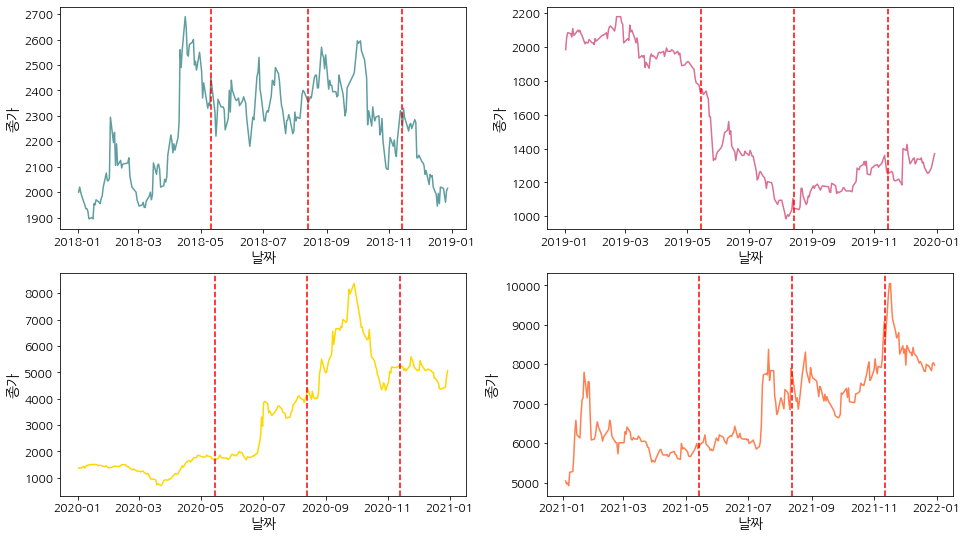

In [8]:
from datetime import datetime
plt.figure(figsize=(16, 9))

plt.subplot(221)
sns.lineplot(x=yg_plus_2018.index, y=yg_plus_2018['종가'], color = 'cadetblue')
plt.axvline(x=datetime(2018, 5, 11), color='r', linestyle='--')
plt.axvline(x=datetime(2018, 8, 14), color='r', linestyle='--')
plt.axvline(x=datetime(2018, 11, 14), color='r', linestyle='--')

plt.subplot(222)
sns.lineplot(x=yg_plus_2019.index, y=yg_plus_2019['종가'], color = 'palevioletred')
plt.axvline(x=datetime(2019, 5, 15), color='r', linestyle='--')
plt.axvline(x=datetime(2019, 8, 14), color='r', linestyle='--')
plt.axvline(x=datetime(2019, 11, 14), color='r', linestyle='--')

plt.subplot(223)
sns.lineplot(x=yg_plus_2020.index, y=yg_plus_2020['종가'], color = 'gold')
plt.axvline(x=datetime(2020, 5, 15), color='r', linestyle='--')
plt.axvline(x=datetime(2020, 8, 14), color='r', linestyle='--')
plt.axvline(x=datetime(2020, 11, 13), color='r', linestyle='--')

plt.subplot(224)
sns.lineplot(x=yg_plus_2021.index, y=yg_plus_2021['종가'], color = 'coral')
plt.axvline(x=datetime(2021, 5, 14), color='r', linestyle='--')
plt.axvline(x=datetime(2021, 8, 13), color='r', linestyle='--')
plt.axvline(x=datetime(2021, 11, 12), color='r', linestyle='--')

plt.show()

In [9]:
# yg_plus의 index level을 줄여서 날짜를 index가 아닌 column으로 만들어준다.
yg_plus.reset_index(level=0, inplace=True)

In [10]:
yg_plus

,날짜,시가,고가,저가,종가,거래량
0,2020-07-03,4100,4470,3630,3900,66519638
1,2020-07-06,3965,4070,3715,3815,11580605
2,2020-07-07,3800,3800,3330,3470,12317461
3,2020-07-08,3470,4020,3450,3535,22046394
4,2020-07-09,3550,3575,3340,3455,4987272
...,...,...,...,...,...,...
448,2022-04-27,6680,7070,6670,7060,494021
449,2022-04-28,7060,7060,6890,6930,202265
450,2022-04-29,6940,7100,6940,6990,215900
451,2022-05-02,6850,7080,6850,7030,193554


## 매매 동향 traiding_trend

In [11]:
traiding_trend = stock.get_market_trading_volume_by_date("20200703", "20220503", "037270")
traiding_trend.head()

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2020-07-03,126858,4994,431741,-563593,0
2020-07-06,-392,-11650,96755,-84713,0
2020-07-07,-130177,54675,59202,16300,0
2020-07-08,738,-32168,74204,-42774,0
2020-07-09,-665,-4094,-23583,28342,0


In [12]:
traiding_trend.reset_index(level=0, inplace=True)

### traiding_trend_date

In [13]:
traiding_trend_date = traiding_trend.copy()

In [15]:
# 두 그래프의 차이를 더 명확하게 보기 위해 날짜 index를 column으로 변환 후 기간을 줄여준다.
traiding_trend_date.reset_index(level=0, inplace=True)

In [16]:
# pd.to_datetime를 사용하여 날짜 column을 날짜 데이터로 변경해준다.
traiding_trend_date['Date'] = pd.to_datetime(traiding_trend_date['날짜'],format='%Y-%m-%d')

In [17]:
# 두 그래프 간의 차이를 보기 위해 시각화 할 기간을 조정해준다.
traiding_trend_date = traiding_trend_date.query('"2021-07-01"<= Date <= "2022-05-04"')

In [18]:
traiding_trend_date

,index,날짜,기관합계,기타법인,개인,외국인합계,전체,Date
246,246,2021-07-01,1330,900,-49683,47453,0,2021-07-01
247,247,2021-07-02,35,6643,38497,-45175,0,2021-07-02
248,248,2021-07-05,-4241,100,-10626,14767,0,2021-07-05
249,249,2021-07-06,2190,1829,12469,-16488,0,2021-07-06
250,250,2021-07-07,30,220,-5902,5652,0,2021-07-07
...,...,...,...,...,...,...,...,...
448,448,2022-04-27,-4321,-2673,7928,-934,0,2022-04-27
449,449,2022-04-28,677,290,52378,-53345,0,2022-04-28
450,450,2022-04-29,-1815,0,-12114,13929,0,2022-04-29
451,451,2022-05-02,7441,7,-44790,37342,0,2022-05-02


In [19]:
# 시간 데이터로 변경된 Date 컬럼이 존재하므로 기존의 날짜 column은 지워준다.
del traiding_trend_date['날짜']

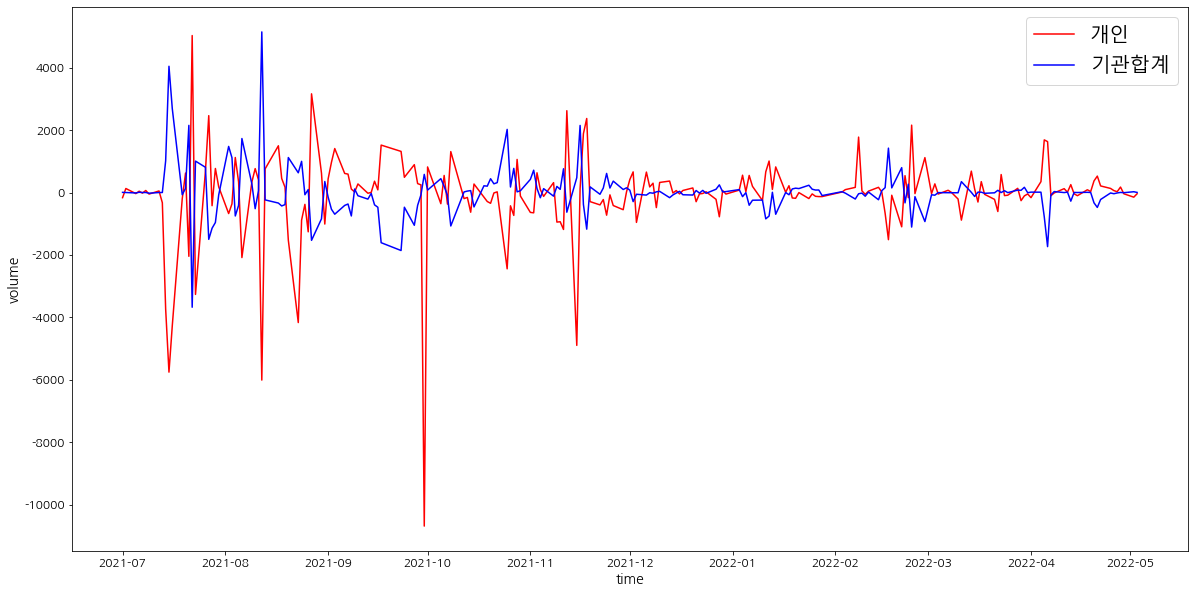

In [20]:
plt.figure(figsize=(20, 10))

# 보기 좋은 시각화를 위해 크기를 줄여준다.
sns.lineplot(x = traiding_trend_date['Date'], y=traiding_trend_date['개인']/300,color = 'red')
sns.lineplot(x = traiding_trend_date['Date'], y=traiding_trend_date['기관합계']/300,color = 'blue')

plt.xlabel('time')
plt.ylabel('volume')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('legend', fontsize=20)
plt.legend(labels=["개인","기관합계"])
plt.show()

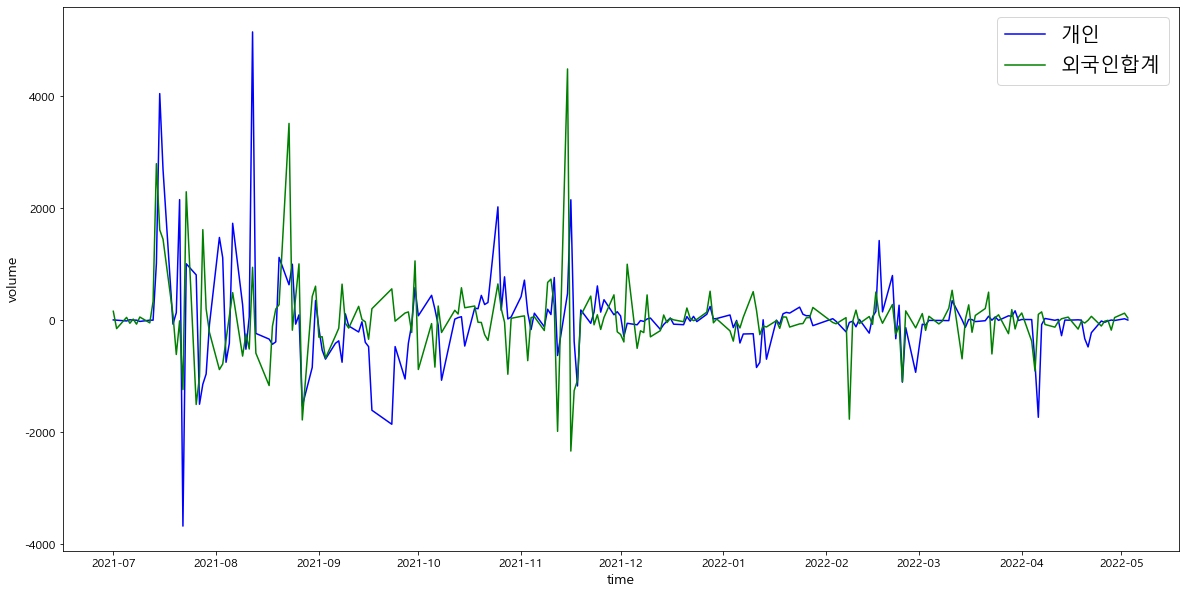

In [21]:
plt.figure(figsize=(20, 10))

# 보기 좋은 시각화를 위해 크기를 줄여준다.
sns.lineplot(x = traiding_trend_date['Date'], y=traiding_trend_date['기관합계']/300,color = 'blue')
sns.lineplot(x = traiding_trend_date['Date'], y=traiding_trend_date['외국인합계']/300,color = 'green')

plt.xlabel('time')
plt.ylabel('volume')
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rc('legend', fontsize=20)
plt.legend(labels=["개인","외국인합계"])
plt.show()

### 종가와 거래량 시각화

In [22]:
traiding_trend

,날짜,기관합계,기타법인,개인,외국인합계,전체
0,2020-07-03,126858,4994,431741,-563593,0
1,2020-07-06,-392,-11650,96755,-84713,0
2,2020-07-07,-130177,54675,59202,16300,0
3,2020-07-08,738,-32168,74204,-42774,0
4,2020-07-09,-665,-4094,-23583,28342,0
...,...,...,...,...,...,...
448,2022-04-27,-4321,-2673,7928,-934,0
449,2022-04-28,677,290,52378,-53345,0
450,2022-04-29,-1815,0,-12114,13929,0
451,2022-05-02,7441,7,-44790,37342,0


In [23]:
traiding_trend['Date'] = pd.to_datetime(traiding_trend['날짜'],format='%Y-%m-%d')

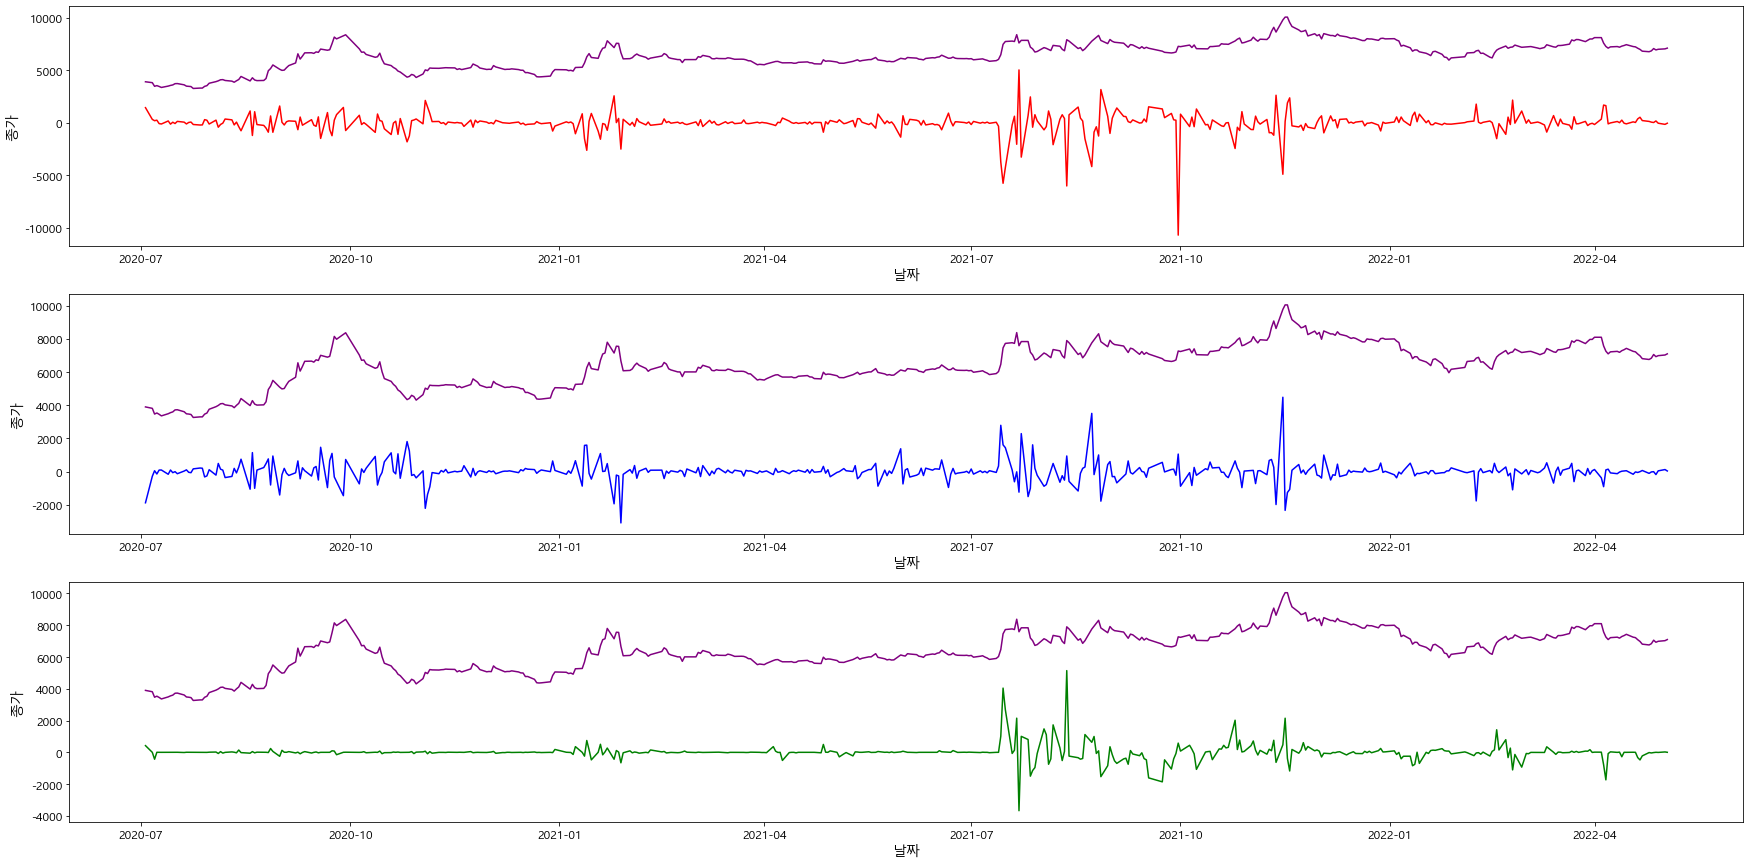

In [43]:
plt.figure(figsize=(30, 15))
plt.rcParams['font.family'] = 'Malgun Gothic'

# 종가와 개인거래량
plt.subplot(311)
sns.lineplot(x=yg_plus['날짜'], y=yg_plus['종가'], color = 'purple')
sns.lineplot(x = traiding_trend['Date'], y=traiding_trend['개인']/300,color = 'red')


# 종가와 외인거래량
plt.subplot(312)
sns.lineplot(x=yg_plus['날짜'], y=yg_plus['종가'], color = 'purple')
sns.lineplot(x = traiding_trend['Date'], y=traiding_trend['외국인합계']/300,color = 'blue')


# 종가와 기관거래량
plt.subplot(313)

sns.lineplot(x=yg_plus['날짜'], y=yg_plus['종가'], color = 'purple')
sns.lineplot(x = traiding_trend['Date'], y=traiding_trend['기관합계']/300,color = 'green')


plt.show()


### 실적발표와 외인,기관 매수 비교

In [36]:
df1 = yg_plus.copy()
df2 = traiding_trend.copy()

In [37]:
df1['Date'] = pd.to_datetime(traiding_trend['날짜'],format='%Y-%m-%d')
del df1['날짜']
del df2['날짜']

In [71]:
df1_performance1 = df1.query('"2021-04-25"<= Date <= "2021-05-28"') #0514
df2_performance1 = df2.query('"2021-04-25"<= Date <= "2021-05-28"')

df1_performance2 = df1.query('"2021-07-25"<= Date <= "2021-08-27"') #0813
df2_performance2 = df2.query('"2021-07-27"<= Date <= "2021-08-27"')

df1_performance3 = df1.query('"2021-10-24"<= Date <= "2021-11-26"') #1112
df2_performance3 = df2.query('"2021-10-24"<= Date <= "2021-11-26"')

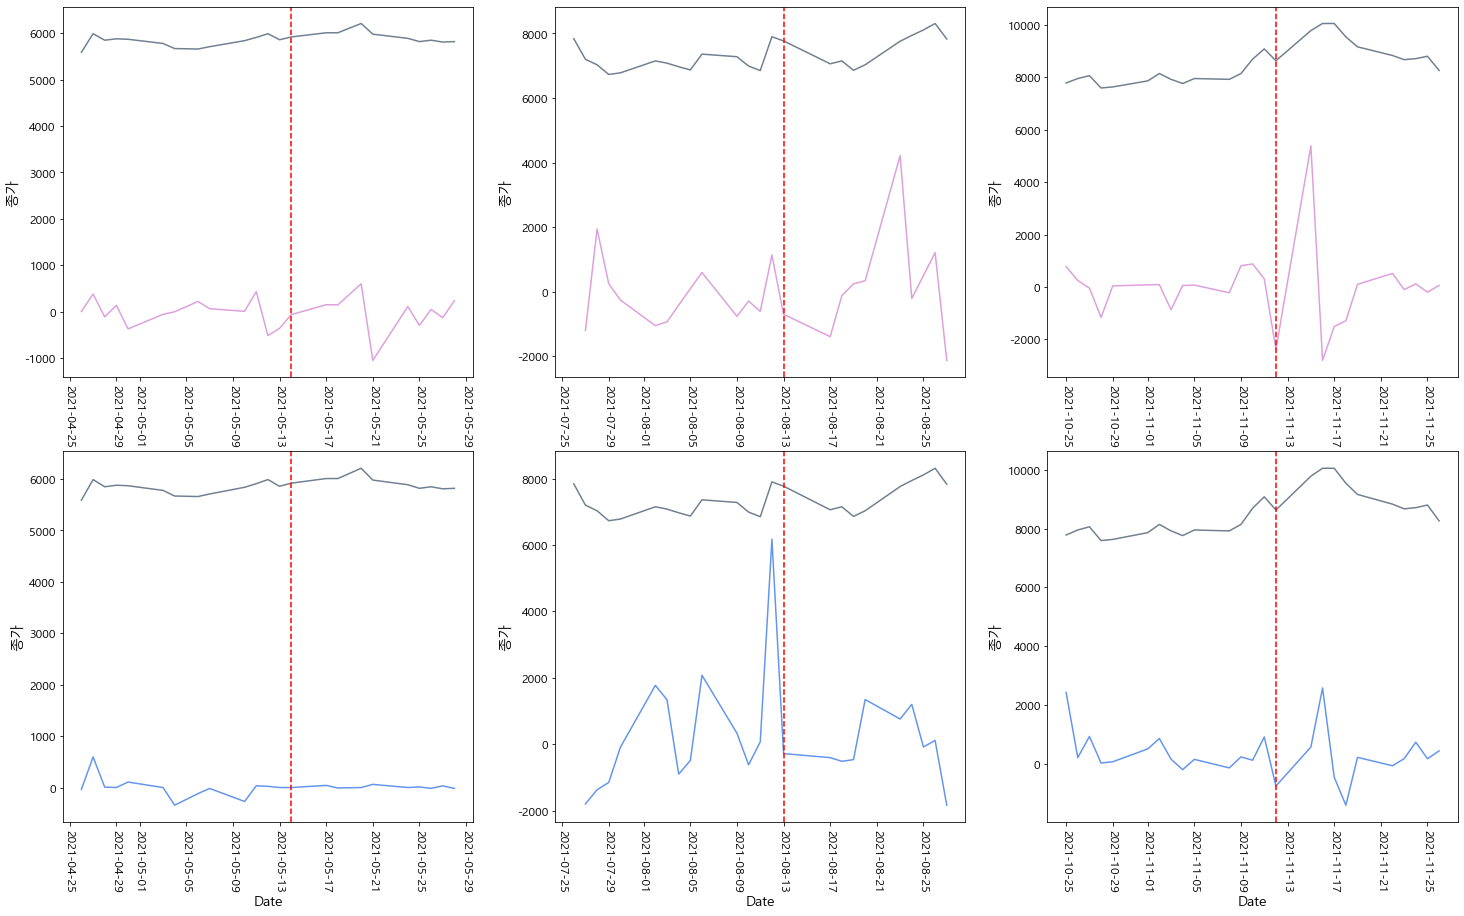

In [88]:
plt.figure(figsize=(25, 15))
plt.rcParams['font.family'] = 'Malgun Gothic'

# 2021.03 분기보고서
plt.subplot(231)
sns.lineplot(x=df1_performance1['Date'], y=df1_performance1['종가'], color = 'slategray')
sns.lineplot(x =df2_performance1['Date'], y=df2_performance1['외국인합계']/250,color = 'plum')
plt.axvline(x=datetime(2021, 5, 14), color='r', linestyle='--')
plt.xticks(rotation=-90)


# 2021.06 반기보고서
plt.subplot(232)
sns.lineplot(x=df1_performance2['Date'], y=df1_performance2['종가'], color = 'slategray')
sns.lineplot(x =df2_performance2['Date'], y=df2_performance2['외국인합계']/250,color = 'plum')
plt.axvline(x=datetime(2021, 8, 13), color='r', linestyle='--')
plt.xticks(rotation=-90)


# 2021.09 분기보고서
plt.subplot(233)

sns.lineplot(x=df1_performance3['Date'], y=df1_performance3['종가'], color = 'slategray')
sns.lineplot(x =df2_performance3['Date'], y=df2_performance3['외국인합계']/250,color = 'plum')
plt.axvline(x=datetime(2021, 11, 12), color='r', linestyle='--')
plt.xticks(rotation=-90)

# 2021.03 분기보고서
plt.subplot(234)
sns.lineplot(x=df1_performance1['Date'], y=df1_performance1['종가'], color = 'slategray')
sns.lineplot(x =df2_performance1['Date'], y=df2_performance1['기관합계']/250,color = 'cornflowerblue')
plt.axvline(x=datetime(2021, 5, 14), color='r', linestyle='--')
plt.xticks(rotation=-90)


# 2021.06 반기보고서
plt.subplot(235)
sns.lineplot(x=df1_performance2['Date'], y=df1_performance2['종가'], color = 'slategray')
sns.lineplot(x =df2_performance2['Date'], y=df2_performance2['기관합계']/250,color = 'cornflowerblue')
plt.axvline(x=datetime(2021, 8, 13), color='r', linestyle='--')
plt.xticks(rotation=-90)


# 2021.09 분기보고서
plt.subplot(236)

sns.lineplot(x=df1_performance3['Date'], y=df1_performance3['종가'], color = 'slategray')
sns.lineplot(x =df2_performance3['Date'], y=df2_performance3['기관합계']/250,color = 'cornflowerblue')
plt.axvline(x=datetime(2021, 11, 12), color='r', linestyle='--')
plt.xticks(rotation=-90)

plt.show()


## 데이터 분석

### 일자별 DIV/BPS/PER/EPS 조회

In [26]:
yg_per = stock.get_market_fundamental("20200703", "20220503", "037270")
yg_per

,BPS,PER,PBR,EPS,DIV,DPS
날짜,,,,,,
2020-07-03,1562,0.0,2.50,0,0.0,0
2020-07-06,1562,0.0,2.44,0,0.0,0
2020-07-07,1562,0.0,2.22,0,0.0,0
2020-07-08,1562,0.0,2.26,0,0.0,0
2020-07-09,1562,0.0,2.21,0,0.0,0
...,...,...,...,...,...,...
2022-04-27,1487,0.0,4.75,0,0.0,0
2022-04-28,1487,0.0,4.66,0,0.0,0
2022-04-29,1487,0.0,4.70,0,0.0,0


###  일자별 공매도 거래 현황

In [27]:
yg_short= stock.get_shorting_volume_by_date("20200703", "20220503", "037270")
yg_short

,공매도,매수,비중
날짜,,,
2020-07-03,0,66519638,0.00
2020-07-06,23,11580605,0.00
2020-07-07,5,12317461,0.00
2020-07-08,6,22046394,0.00
2020-07-09,2,4987272,0.00
...,...,...,...
2022-04-27,17,494021,0.00
2022-04-28,0,202265,0.00
2022-04-29,158,215900,0.07


### 기존데이터불러오기

In [28]:
# 시가 고가 저가 종가 거래량 조회
yg_plus = stock.get_market_ohlcv("20200703", "20220503", "037270")
yg_plus

,시가,고가,저가,종가,거래량
날짜,,,,,
2020-07-03,4100,4470,3630,3900,66519638
2020-07-06,3965,4070,3715,3815,11580605
2020-07-07,3800,3800,3330,3470,12317461
2020-07-08,3470,4020,3450,3535,22046394
2020-07-09,3550,3575,3340,3455,4987272
...,...,...,...,...,...
2022-04-27,6680,7070,6670,7060,494021
2022-04-28,7060,7060,6890,6930,202265
2022-04-29,6940,7100,6940,6990,215900


In [29]:
traiding_trend = stock.get_market_trading_volume_by_date("20200703", "20220503", "037270")
traiding_trend

,기관합계,기타법인,개인,외국인합계,전체
날짜,,,,,
2020-07-03,126858,4994,431741,-563593,0
2020-07-06,-392,-11650,96755,-84713,0
2020-07-07,-130177,54675,59202,16300,0
2020-07-08,738,-32168,74204,-42774,0
2020-07-09,-665,-4094,-23583,28342,0
...,...,...,...,...,...
2022-04-27,-4321,-2673,7928,-934,0
2022-04-28,677,290,52378,-53345,0
2022-04-29,-1815,0,-12114,13929,0


## 날짜별 concat

In [30]:
yg_concat = pd.concat([yg_plus,traiding_trend,yg_per, yg_short], axis = 1)

In [31]:
del yg_concat['전체']
del yg_concat['DIV']
del yg_concat['DPS']

In [32]:
yg_concat.rename(columns={'시가':'Open','고가':'High','저가':'Low','종가':'Close','거래량':'Volume',
'기관합계':'Gov','기타법인':'Cor','개인':'Indiv','외국인합계':'For','공매도':'Short','매수':'Buy','비중':'Share'}, inplace = True)

In [33]:
yg_concat

,Open,High,Low,Close,Volume,Gov,Cor,Indiv,For,BPS,PER,PBR,EPS,Short,Buy,Share
날짜,,,,,,,,,,,,,,,,
2020-07-03,4100,4470,3630,3900,66519638,126858,4994,431741,-563593,1562,0.0,2.50,0,0,66519638,0.00
2020-07-06,3965,4070,3715,3815,11580605,-392,-11650,96755,-84713,1562,0.0,2.44,0,23,11580605,0.00
2020-07-07,3800,3800,3330,3470,12317461,-130177,54675,59202,16300,1562,0.0,2.22,0,5,12317461,0.00
2020-07-08,3470,4020,3450,3535,22046394,738,-32168,74204,-42774,1562,0.0,2.26,0,6,22046394,0.00
2020-07-09,3550,3575,3340,3455,4987272,-665,-4094,-23583,28342,1562,0.0,2.21,0,2,4987272,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-04-27,6680,7070,6670,7060,494021,-4321,-2673,7928,-934,1487,0.0,4.75,0,17,494021,0.00
2022-04-28,7060,7060,6890,6930,202265,677,290,52378,-53345,1487,0.0,4.66,0,0,202265,0.00
2022-04-29,6940,7100,6940,6990,215900,-1815,0,-12114,13929,1487,0.0,4.70,0,158,215900,0.07


In [34]:
yg_concat['PER'].value_counts()

0.0     451
20.2      1
20.4      1
Name: PER, dtype: int64

In [35]:
yg_concat[yg_concat['PER'] == 20.2]

,Open,High,Low,Close,Volume,Gov,Cor,Indiv,For,BPS,PER,PBR,EPS,Short,Buy,Share
날짜,,,,,,,,,,,,,,,,
2022-05-02,6850,7080,6850,7030,193554,7441,7,-44790,37342,2125,20.2,3.31,348,0,193554,0.0


In [36]:
yg_concat[yg_concat['PER'] == 20.4]

,Open,High,Low,Close,Volume,Gov,Cor,Indiv,For,BPS,PER,PBR,EPS,Short,Buy,Share
날짜,,,,,,,,,,,,,,,,
2022-05-03,7070,7220,7040,7100,296146,651,-7,-12198,11554,2125,20.4,3.34,348,0,296146,0.0


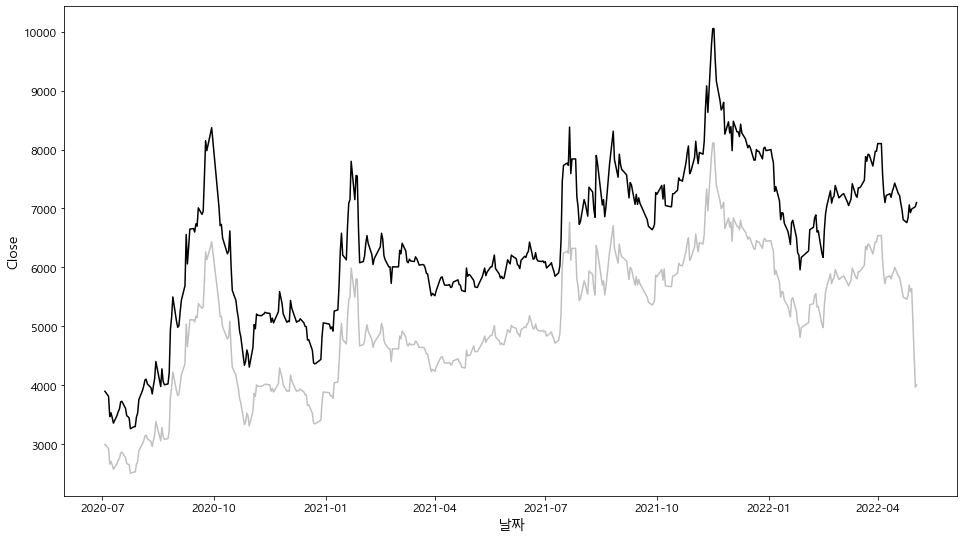

In [37]:
plt.figure(figsize=(16, 9))
sns.lineplot(x=yg_concat.index, y=yg_concat['Close'], color = 'black')
sns.lineplot(x=yg_concat.index, y=yg_concat['PBR']*1200, color = 'silver')

# plt.plot(yg_concat.index, yg_concat['Close'],color = 'black')
# plt.plot(yg_concat.index,  yg_concat['PBR'], color = 'silver')

plt.show()

## 상관관계 분석

In [38]:
yg_concat.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
Gov       0
Cor       0
Indiv     0
For       0
BPS       0
PER       0
PBR       0
EPS       0
Short     0
Buy       0
Share     0
dtype: int64

In [39]:
corr_matrix = yg_concat.corr()
corr_matrix["Close"].sort_values(ascending=False)

Close     1.000000
PBR       0.991613
Low       0.991266
High      0.986595
Open      0.980167
Short     0.199068
Share     0.128996
Gov       0.076793
PER       0.034381
EPS       0.034372
Cor       0.029639
For      -0.002319
Volume   -0.024246
Buy      -0.024246
Indiv    -0.053577
BPS      -0.432908
Name: Close, dtype: float64

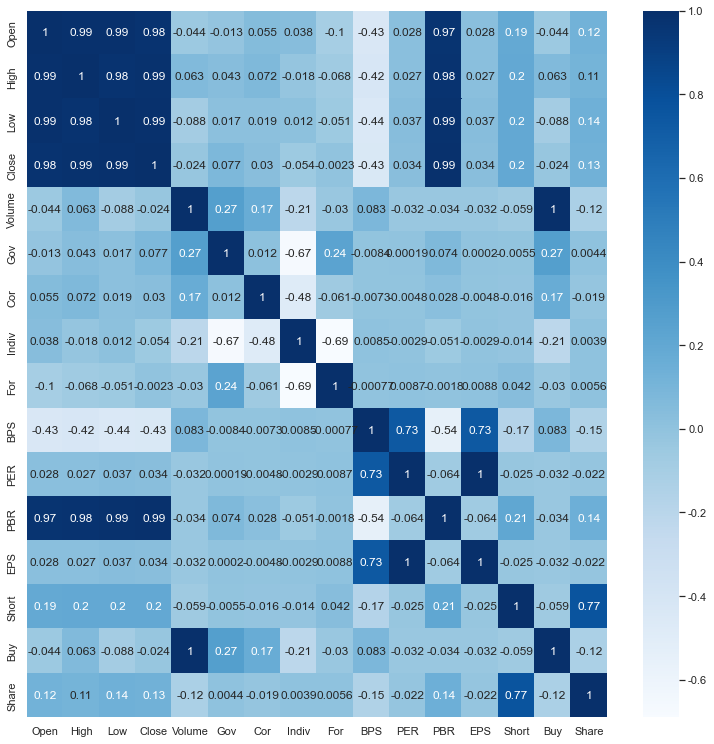

In [45]:
# plt.rcParams['font.family'] = 'Malgun Gothic'

sns.set(rc = {'figure.figsize':(13,13)})
sns.heatmap(corr_matrix, cmap='Blues',annot=True)


In [41]:
yg_concat['PBR'].describe()

count    453.000000
mean       4.213861
std        0.927487
min        2.090000
25%        3.620000
50%        4.180000
75%        4.890000
max        6.760000
Name: PBR, dtype: float64

# 재무제표 및 ROE 조회 API

### roe 가져오기

In [42]:
from urllib import parse 
import pandas as pd 
def get_fnguide(code) :
    get_param = {
        'pGB':1, 
        'gicode':'A%s'%(code), 
        'cID':'', 'MenuYn':'Y', 
        'ReportGB':'', 
        'NewMenuID':101, 
        'stkGb':701, } 
    get_param = parse.urlencode(get_param) 
    url="http://comp.fnguide.com/SVO2/ASP/SVD_Main.asp?%s"%(get_param) 
    tables = pd.read_html(url, header=0) 
    return(tables) 

get_fnguide('037270')

[              종가/ 전일대비                    7,160/ +60            거래량  \
 0         52주.최고가/ 최저가                 10,050/ 5,660       거래대금(억원)   
 1  수익률(1M/ 3M/ 6M/ 1Y)  -11.60/ +7.83/ -7.73/ +26.28       외국인 보유비중   
 2      시가총액(상장예정포함,억원)                          4542         베타(1년)   
 3         시가총액(보통주,억원)                          4542            액면가   
 4                  NaN                           NaN            NaN   
 5      발행주식수(보통주/ 우선주)                 63,429,410/ 0  유동주식수/비율(보통주)   
 
               338,841  
 0                  24  
 1                1.53  
 2             0.97423  
 3                 500  
 4                 NaN  
 5  42,038,372 / 66.28  ,
   잠정실적발표예정일 예상실적(영업이익, 억원) 3개월전예상실적대비(%) 전년동기대비(%)
 0         -              -             -         -,
          운용사명     보유수량   시가평가액  상장주식수내비중  운용사내비중
 0      삼성자산운용  1577.85  125.91      2.49    0.02
 1  한국투자밸류자산운용   840.45   67.07      1.33    0.27
 2  하나유비에스자산운용   176.51   14.09      0.28    0.01
 3     파인만자산운

In [43]:
# 연간 Financial Highlight 정보
yg_fin = get_fnguide('037270')[11]
yg_fin

,IFRS(연결),Annual,Annual.1,Annual.2,Annual.3,Annual.4,Annual.5,Annual.6,Annual.7
0,IFRS(연결),2017/12,2018/12,2019/12,2020/12,2021/12,2022/12(E),2023/12(E),2024/12(E)
1,매출액,725,936,1136,1071,1543,NaN,NaN,NaN
2,영업이익,-71,17,33,14,39,NaN,NaN,NaN
3,영업이익(발표기준),-60,17,45,61,256,NaN,NaN,NaN
4,당기순이익,-100,-14,-43,-75,226,NaN,NaN,NaN
5,지배주주순이익,-82,-1,-33,-63,219,NaN,NaN,NaN
6,비지배주주순이익,-18,-13,-10,-12,7,NaN,NaN,NaN
7,자산총계,1360,1468,1567,1510,2231,NaN,NaN,NaN
8,부채총계,219,313,449,468,774,NaN,NaN,NaN
9,자본총계,1141,1155,1118,1041,1457,NaN,NaN,NaN


In [91]:
# index 순서를 기준으로 "배당수익률" 행 삭제
yg_fin = yg_fin.drop([yg_fin.index[25]])

In [92]:
# yg_fin_25 = yg_fin[yg_fin['IFRS(연결)']=="배당수익률"].index
# yg_fin = yg_fin.drop(yg_fin_25)

In [93]:
yg_fin

,IFRS(연결),Annual,Annual.1,Annual.2,Annual.3,Annual.4,Annual.5,Annual.6,Annual.7
0,IFRS(연결),2017/12,2018/12,2019/12,2020/12,2021/12,2022/12(E),2023/12(E),2024/12(E)
1,매출액,725,936,1136,1071,1543,NaN,NaN,NaN
2,영업이익,-71,17,33,14,39,NaN,NaN,NaN
3,영업이익(발표기준),-60,17,45,61,256,NaN,NaN,NaN
4,당기순이익,-100,-14,-43,-75,226,NaN,NaN,NaN
5,지배주주순이익,-82,-1,-33,-63,219,NaN,NaN,NaN
6,비지배주주순이익,-18,-13,-10,-12,7,NaN,NaN,NaN
7,자산총계,1360,1468,1567,1510,2231,NaN,NaN,NaN
8,부채총계,219,313,449,468,774,NaN,NaN,NaN
9,자본총계,1141,1155,1118,1041,1457,NaN,NaN,NaN


In [94]:
# NaN 값 행 삭제
del yg_fin["Annual.5"]
del yg_fin["Annual.6"]
del yg_fin["Annual.7"]

In [95]:
yg_fin

,IFRS(연결),Annual,Annual.1,Annual.2,Annual.3,Annual.4
0,IFRS(연결),2017/12,2018/12,2019/12,2020/12,2021/12
1,매출액,725,936,1136,1071,1543
2,영업이익,-71,17,33,14,39
3,영업이익(발표기준),-60,17,45,61,256
4,당기순이익,-100,-14,-43,-75,226
5,지배주주순이익,-82,-1,-33,-63,219
6,비지배주주순이익,-18,-13,-10,-12,7
7,자산총계,1360,1468,1567,1510,2231
8,부채총계,219,313,449,468,774
9,자본총계,1141,1155,1118,1041,1457


In [87]:
# yg_fin.reset_index(level=0, inplace=True)

In [102]:
yg_fin.iloc[18]

IFRS(연결)      ROE
Annual      -8.19
Annual.1    -0.15
Annual.2    -3.48
Annual.3    -6.94
Annual.4    19.57
Name: 18, dtype: object

In [85]:
yg_fin.iloc[18].to_list()

['ROE', '-8.19', '-0.15', '-3.48', '-6.94', '19.57']

In [105]:
values = [[-8.19], [-0.15], [-3.48], [-6.94], [19.57]]
yg_roe = pd.DataFrame(
        values,
        columns=["ROE"],
        index=["2017/12", "2018/12", "2019/12","2020/12","2021/12"]
     )
yg_roe

,ROE
2017/12,-8.19
2018/12,-0.15
2019/12,-3.48
2020/12,-6.94
2021/12,19.57


### ROA 구하기

In [106]:
yg_fin.iloc[17].to_list()

['ROA', '-7.71', '-1.01', '-2.80', '-4.86', '12.09']

In [107]:
values = [[-7.71], [-1.01], [-2.80], [-4.86], [12.09]]
yg_roa = pd.DataFrame(
        values,
        columns=["ROA"],
        index=["2017/12", "2018/12", "2019/12","2020/12","2021/12"]
     )
yg_roa

,ROA
2017/12,-7.71
2018/12,-1.01
2019/12,-2.80
2020/12,-4.86
2021/12,12.09
